<a href="https://colab.research.google.com/github/aayushrai/HackerEarth_Flower_Challange/blob/master/Hackerearth_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip

--2019-09-14 10:55:20--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.48.55
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.48.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip’

HE_Challenge_data.z 100%[===================>] 905.00M  13.6MB/s    in 69s     

2019-09-14 10:56:31 (13.0 MB/s) - ‘HE_Challenge_data.zip’ saved [948965311/948965311]



In [2]:
!unzip /content/HE_Challenge_data.zip


Archive:  /content/HE_Challenge_data.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
   creating: data/test/
  inflating: data/test/.DS_Store     
  inflating: data/test/18540.jpg     
  inflating: data/test/18541.jpg     
  inflating: data/test/18542.jpg     
  inflating: data/test/18543.jpg     
  inflating: data/test/18544.jpg     
  inflating: data/test/18545.jpg     
  inflating: data/test/18546.jpg     
  inflating: data/test/18547.jpg     
  inflating: data/test/18548.jpg     
  inflating: data/test/18549.jpg     
  inflating: data/test/18550.jpg     
  inflating: data/test/18551.jpg     
  inflating: data/test/18552.jpg     
  inflating: data/test/18553.jpg     
  inflating: data/test/18554.jpg     
  inflating: data/test/18555.jpg     
  inflating: data/test/18556.jpg     
  inflating: data/test/18557.jpg     
  inflating: data/test/18558.jpg     
  inflating: data/test/18559.jpg     
  inflating: data/test/18560.jpg     
  inflating: data/t

In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPool2D,Lambda
from sklearn.preprocessing import OneHotEncoder
import cv2
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from sklearn.model_selection import train_test_split
from keras.regularizers import l1,l2
import skimage

Using TensorFlow backend.


In [0]:
df = pd.read_csv("/content/data/train.csv")

In [0]:
img_name = df["image_id"].values
Y_ = df["category"].values
Y_ = Y_.reshape(-1,1)

In [6]:
onehot = OneHotEncoder()
Y2 = onehot.fit_transform(Y_).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
 X= []
Y = []
for i,name in enumerate(img_name):
    img = cv2.imread("/content/data/train/{}.jpg".format(name))
    img = cv2.resize(img,(95,95))
    X.append(img)
    flipHorizontal = cv2.flip(img, 1)
    X.append(flipHorizontal)
    Y.append(Y2[i,:])
    Y.append(Y2[i,:])
    print(name)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
X = np.array(X)/255
Y = np.array(Y)
Y2 = 0
df = 0
Y_ = 0

In [9]:
X.shape

(37080, 95, 95, 3)

In [10]:
Y.shape

(37080, 102)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25,shuffle=True)

In [0]:
X =0
Y =0

In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (11,11),padding = 'Same',activation ='relu', input_shape = (95,95,3)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.4))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(4096, activation = "relu",kernel_regularizer=l2(.001)))
model.add(Dropout(0.3))
model.add(Dense(4096, activation = "relu",kernel_regularizer=l2(.0001)))
model.add(Dropout(0.2))
model.add(Dense(102, activation = "softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 95, 95, 32)        11648     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,800,epochs=500,validation_data=(x_test,y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 27810 samples, validate on 9270 samples
Epoch 1/500
27810/27810 [==============================] - 42s 2ms/step - loss: 8.2474 - acc: 0.0263 - val_loss: 6.4999 - val_acc: 0.0535
Epoch 2/500
27810/27810 [==============================] - 29s 1ms/step - loss: 5.6695 - acc: 0.0519 - val_loss: 5.3455 - val_acc: 0.0366
Epoch 3/500
27810/27810 [==============================] - 29s 1ms/step - loss: 4.6264 - acc: 0.0723 - val_loss: 5.4157 - val_acc: 0.0378
Epoch 4/500
27810/27810 [==============================] - 29s 1ms/step - loss: 4.1504 - acc: 0.0989 - val_loss: 5.4905 - val_acc: 0.0398
Epoch 5/500
27810/27810 [==============================] - 29s 1ms/step - loss: 3.8380 - acc: 0.1294 - val_loss: 5.0941 - val_acc: 0.0398
Epoch 6/500
27810/27810 [==============================] - 29s 1ms/step - loss: 3.6033 - acc: 0.1634 - val_loss: 5.0553 - val_acc: 0.0461
Epoch 7/500
27810/27810 [==

In [0]:
model.save("perfect.h5")

In [0]:
history.history

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [0]:
df1 = pd.read_csv("/content/data/sample_submission.csv")
img_name1 = df1["image_id"].values

In [0]:
X1= []
for name in img_name1: n
    img = cv2.imread("/content/data/test/{}.jpg".format(name))
    img = cv2.resize(img,(95,95))
    X1.append(img)

In [0]:
X1 = np.array(X1)/255
X1.shape

(2009, 95, 95, 3)

In [0]:
pred = model.predict_classes(X1)

In [0]:
pred

array([ 8, 39, 38, ..., 76, 71, 29])

In [0]:
sample = []
for x,y in zip(img_name1,pred):
    sample.append([x,y+1])

In [0]:
dataframe = pd.DataFrame(sample,columns=["image_id","category"])

In [0]:
dataframe.to_csv("sample9.csv",index=False)

102


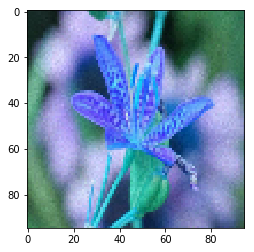

In [0]:
img = cv2.imread("/content/data/test/18941.jpg")
img2 = cv2.resize(img,(95,95))/255
img = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
print(model.predict_classes(img)[0]+1)
plt.imshow(img2)